# <center>Organizaci&oacute;n de Datos</center>
## <center>Trabajo Práctico 1 : Reservas de Hotel</center>
## <center>Checkpoint 3</center>
### <center>Ensambles</center>

#### Integrantes grupo 19: Sudanalytics 
* Adrian Leandro Re
* Alan Toulouse
* Luciano Lorenzo
* Nicolas Tonizzo

## Ensamble híbrido
Cargaremos los modelos creados con las notebooks anteriores usando la libreria pickle

In [12]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.ensemble import VotingClassifier, StackingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

decision_tree = pickle.load(open('../modelos/decision_tree.pickle', 'rb'))
rf = pickle.load(open('../modelos/rf.pickle', 'rb'))
xgb = pickle.load(open('../modelos/xgb.pickle', 'rb'))
svm = pickle.load(open('../modelos/svm.pickle', 'rb'))
knn = pickle.load(open('../modelos/knn.pickle', 'rb'))

In [4]:
df = pd.read_csv("../dataset/hotels_train_procesado.csv")
df.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'id', 'is_canceled', 'hotel_encoding',
       'tiene_hijos', 'es_extranjero', 'es_portugues', 'es_ingles',
       'es_frances', 'es_espanol', 'es_aleman', 'reserved_room_was_assigned',
       'required_a_car_parking_space', 'solo_desayuna_en_el_hotel',
       'pidio_todas_comidas', 'reservo_online', 'reservo_en_grupo',
       'reservo_sin_reembols

Declaramos el target y los features del dataframe que vamos a utilizar para predecir.

In [14]:
target = "is_canceled"

attrs = [
    "hotel_encoding",
    
    "lead_time",
    "reservo_el_mismo_dia",
    "adr",

    "stays_in_weekend_nights",
    "stays_in_week_nights",

    "tiene_hijos",
    "adults",
    #"children",
    #"babies",

    # Fechas
    "arrival_date_week_number",
    "arrival_date_day_of_month",
    "arrival_date_year",

    "es_extranjero",
    "es_portugues",
    "es_ingles",
    "es_frances",
    "es_espanol",
    "es_aleman",

    "reserved_room_was_assigned",

    "is_repeated_guest",
    "previous_cancellations", 
    "previous_bookings_not_canceled",
    "total_reservas_previas",
    "total_of_special_requests",
    "booking_changes",

    # 'meal',
    "solo_desayuna_en_el_hotel",
    "pidio_todas_comidas",

    'required_car_parking_spaces',
    "required_a_car_parking_space",

    "reservo_sin_reembolso",
    "reservo_sin_depositar",
    "reservo_online",
    "reservo_en_grupo",
    "reservo_sin_compania",
    "reservo_sin_agente",
    "reservo_sin_paquete",
    
    "days_in_waiting_list",
    "tuvo_dias_de_espera",
    
    "agent9",
    "agent240",
    "agent1",
    "agent14",
    "agent6",
]

**Dividimos el dataset en entrenamiento y validacion**, para poder validar que no estamos overfitteando al dataset de entrenamiento, y que los modelos van a predecir bien a registros no vistos anteriormente. 

In [15]:
X = df[attrs]
y = df[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, shuffle=True)

Construimos nuestros ensambles de tipo Voting y Stacking, con los modelos que entrenamos en las notebooks anteriores

In [19]:
voting = VotingClassifier(estimators=[('xgb', xgb), ('rf', rf), ('knn', knn)], voting='hard')
stacking = StackingClassifier(estimators=[('xgb', xgb), ('rf', rf), ('decision_tree', decision_tree)], final_estimator=knn)

Los entrenamos con los datos separados anteriormente

In [20]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('xgb',
                              RandomizedSearchCV(cv=3,
                                                 estimator=XGBClassifier(base_score=None,
                                                                         booster=None,
                                                                         callbacks=None,
                                                                         colsample_bylevel=None,
                                                                         colsample_bynode=None,
                                                                         colsample_bytree=None,
                                                                         early_stopping_rounds=None,
                                                                         enable_categorical=False,
                                                                         eval_metric=None,
                                                                         feature_types=None,
                                                                         gamma=None,
                                                                         gpu_id=None,
                                                                         grow_policy=None,
                                                                         importance_type=None,
                                                                         intera...
                                                 param_distributions={'colsample_bytree': [0.6,
                                                                                           0.7,
                                                                                           0.8,
                                                                                           0.9,
                                                                                           1],
                                                                      'max_depth': [10,
                                                                                    11,
                                                                                    12,
                                                                                    13,
                                                                                    14,
                                                                                    15],
                                                                      'subsample': [0.6,
                                                                                    0.7,
                                                                                    0.8,
                                                                                    0.9,
                                                                                    1]},
                                                 scoring=make_scorer(f1_score))),
                             ('rf',
                              RandomForestClassifier(min_samples_split=4,
                                                     n_estimators=50, n_jobs=-1,
                                                     oob_score=True,
                                                     random_state=2)),
                             ('knn',
                              KNeighborsClassifier(algorithm='kd_tree',
                                                   metric='manhattan',
                                                   n_neighbors=18,
                                                   weights='distance'))])

In [22]:
stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('xgb',
                                RandomizedSearchCV(cv=3,
                                                   estimator=XGBClassifier(base_score=None,
                                                                           booster=None,
                                                                           callbacks=None,
                                                                           colsample_bylevel=None,
                                                                           colsample_bynode=None,
                                                                           colsample_bytree=None,
                                                                           early_stopping_rounds=None,
                                                                           enable_categorical=False,
                                                                           eval_metric=None,
                                                                           feature_types=None,
                                                                           gamma=None,
                                                                           gpu_id=None,
                                                                           grow_policy=None,
                                                                           importance_type=None,
                                                                           inte...
                                                   scoring=make_scorer(f1_score))),
                               ('rf',
                                RandomForestClassifier(min_samples_split=4,
                                                       n_estimators=50,
                                                       n_jobs=-1,
                                                       oob_score=True,
                                                       random_state=2)),
                               ('decision_tree',
                                DecisionTreeClassifier(ccp_alpha=0.00015816326530612246,
                                                       max_depth=22,
                                                       min_samples_leaf=16,
                                                       min_samples_split=16))],
                   final_estimator=KNeighborsClassifier(algorithm='kd_tree',
                                                        metric='manhattan',
                                                        n_neighbors=18,
                                                        weights='distance'))

Analizamos el f1 score separando por los sets de validación y entrenamiento

In [24]:
print("f1 score sobre validacion con el ensamble de voting: ", f1_score(y_val, voting.predict(X_val)))
print("f1 score sobre train con el modelo de voting: ", f1_score(y_train, voting.predict(X_train)))

print("f1 score sobre validacion con el ensamble de stacking: ", f1_score(y_val, stacking.predict(X_val)))
print("f1 score sobre train con el ensamble de stacking: ", f1_score(y_train, stacking.predict(X_train)))

f1 score sobre validacion con el ensamble de voting:  0.8838248436103664
f1 score sobre train con el modelo de voting:  0.9943388072601554
f1 score sobre validacion con el ensamble de stacking:  0.8799694189602446
f1 score sobre train con el ensamble de stacking:  0.9753022452504317


Ploteamos la confusion matrix del set de entrenamiento

Text(0.5, 1.0, 'Confusion matrix de training set')

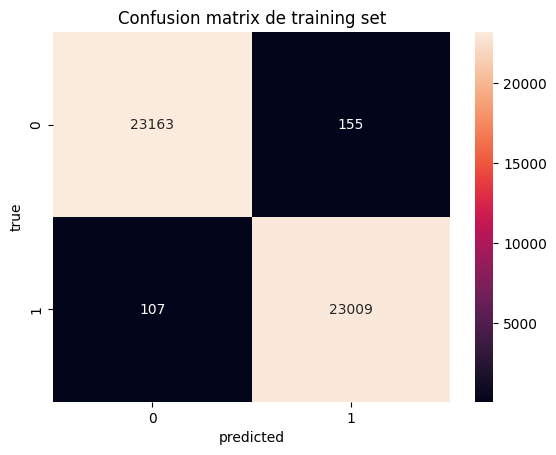

In [25]:
y_pred = voting.predict(X_train)
confusion = confusion_matrix(y_train, y_pred)
sns.heatmap(confusion, annot=True, fmt='.0f')
plt.ylabel('true')
plt.xlabel('predicted')
plt.title("Confusion matrix de training set")

Ploteamos la confusion matrix del set de validación

precision 0.8829230965438082
recall 0.8847284345047923


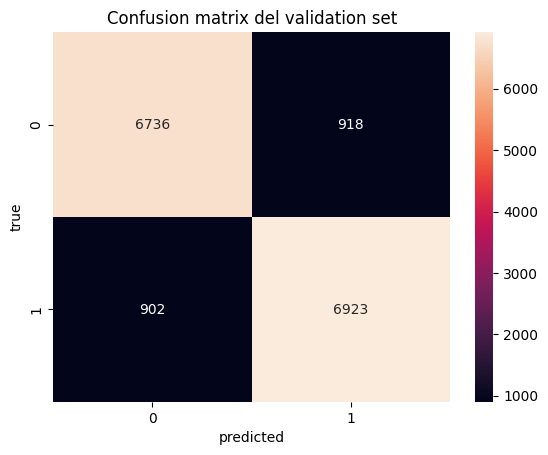

In [26]:
y_pred = voting.predict(X_val)
confusion = confusion_matrix(y_val, y_pred)
sns.heatmap(confusion, annot=True, fmt='.0f')
plt.ylabel('true')
plt.xlabel('predicted')
plt.title("Confusion matrix del validation set (voting)")

In [ ]:
y_pred = stacking.predict(X_train)
confusion = confusion_matrix(y_train, y_pred)
sns.heatmap(confusion, annot=True, fmt='.0f')
plt.ylabel('true')
plt.xlabel('predicted')
plt.title("Confusion matrix de training set (stacking)")

In [ ]:
y_pred = stacking.predict(X_val)
confusion = confusion_matrix(y_val, y_pred)
sns.heatmap(confusion, annot=True, fmt='.0f')
plt.ylabel('true')
plt.xlabel('predicted')
plt.title("Confusion matrix del validation set (stacking)")

# Creacion de submit

In [27]:
def create_submission(model): 
    df_test = pd.read_csv("../dataset/hotels_test_procesado.csv")
    assert(len(df_test)==26535)

    prediccion = model.predict(df_test[attrs].values)
    assert(len(prediccion)==26535)

    submit = pd.DataFrame(
        {"is_canceled": prediccion},
        index=df_test["id"],
    )
    assert(len(submit)==26535)

    submit.to_csv("../dataset/submit.csv")

In [32]:
create_submission(voting)
create_submission(stacking)

/home/adrian/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/adrian/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/adrian/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/adrian/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Guardando los modelos con pickle
Guardamos el ensamble hibrido de tipo voting usando la libreria pickle

In [29]:
with open('../modelos/voting.pickle', 'wb') as file:
    pickle.dump(voting, file)

Ahora guardamos el ensamble de tipo stacking

In [30]:
with open('../modelos/stacking.pickle', 'wb') as file:
    pickle.dump(stacking, file)